In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import numpy as np
import numbers

In [14]:
df = pd.read_csv('movie_metadata.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


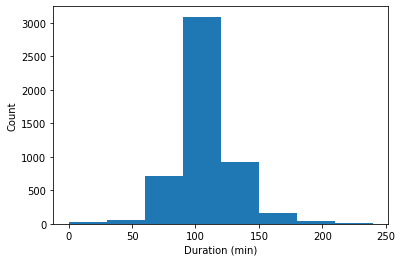

In [13]:
# Q1
x = df[df['duration'] <= 240]['duration']

plt.hist(x, bins=[30*x for x in range(9)])
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.show()

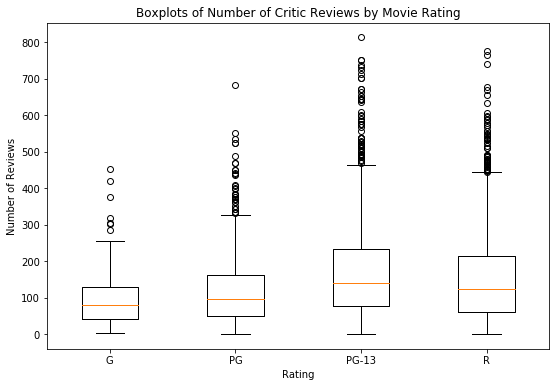

In [142]:
# Q2
G = df[df['content_rating'] == 'G']['num_critic_for_reviews'].dropna()
PG = df[df['content_rating'] == 'PG']['num_critic_for_reviews'].dropna()
PG13 = df[df['content_rating'] == 'PG-13']['num_critic_for_reviews'].dropna()
R = df[df['content_rating'] == 'R']['num_critic_for_reviews'].dropna()

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['G', 'PG', 'PG-13', 'R'])

data_to_plot = [G, PG, PG13, R]
bp = ax.boxplot(data_to_plot)
plt.title('Boxplots of Number of Critic Reviews by Movie Rating')
plt.ylabel('Number of Reviews')
plt.xlabel('Rating')
plt.show()

These boxplots give us a good visual understanding of the approximate range and distribution of the data in each category. The median value of reviews is similar across the four rating categories. G has the lowest median while PG-13 has the highest. We could use statistical testing to determine if the difference is significant. There looks to be a clear difference between the range of review counts. G and PG movies have a similar IQR range, while PG13 and R also share a similar albeit much broader IQR range. PG, PG13, and R rated movies have significantly more outliers than G rated movies. All of the categories are relatively unskewed, if anything there is a slight positive skew in each plot.

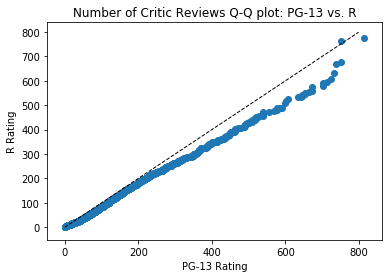

In [135]:
# Q3
def qqplot(x, y, quantiles=None, ax=None):

    ax = plt.gca()

    if quantiles is None:
        quantiles = min(len(x), len(y))

    # Compute quantiles of the two samples
    if isinstance(quantiles, numbers.Integral):
        quantiles = np.linspace(start=0, stop=1, num=int(quantiles))
    else:
        quantiles = np.atleast_1d(np.sort(quantiles))
    x_quantiles = np.quantile(x, quantiles, interpolation='nearest')
    y_quantiles = np.quantile(y, quantiles, interpolation='nearest')

    # Draw the q-q plot
    ax.scatter(x_quantiles, y_quantiles)


# Data
y = R.values
x = PG13.values

# Generate QQ plot
a = [x for x in range(800)]
plt.figure()
plt.plot(a, a, "k--", linewidth=1)
qqplot(x, y)
plt.xlabel('PG-13 Rating')
plt.ylabel('R Rating')
plt.title('Number of Critic Reviews Q-Q plot: PG-13 vs. R')
plt.show()
plt.close()

The count of critic reviews for R and PG-13 movies seem to come from similar distributions given the general adherance of the qq plot to a normal distribution line. However, as the review count increases, the distributions grow farther apart. At higher rating counts, PG-13 movies tend to receive more reviews from critics than R movies. This is shown by the departure from the normal distribution line around the 300 review mark for both R and PG-13 movies.

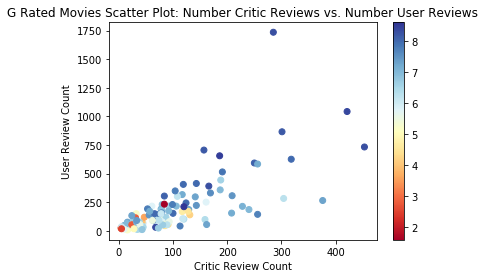

In [138]:
# Q4
G = df[df['content_rating'] == 'G']

plt.scatter(G['num_critic_for_reviews'], G['num_user_for_reviews'], c=G['imdb_score'], cmap=plt.cm.get_cmap('RdYlBu'))
plt.xlabel('Critic Review Count')
plt.ylabel('User Review Count')
plt.title('G Rated Movies Scatter Plot: Number Critic Reviews vs. Number User Reviews')
plt.colorbar()
plt.show()

Generally movies with more reviews have higher IMDB scores, particularly when there is a high user review count. There is a positive correlation between critic and user review counts. Movies with over approximately 750 reviews tend to always have a rating of at least 7.5. 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
35,Color,Dan Scanlon,376.0,104.0,37.0,760.0,Tyler Labine,12000.0,268488329.0,Adventure|Animation|Comedy|Family|Fantasy,...,265.0,English,USA,G,200000000.0,2013.0,779.0,7.3,1.85,44000
41,Color,John Lasseter,304.0,106.0,487.0,776.0,Thomas Kretschmann,1000.0,191450875.0,Adventure|Animation|Comedy|Family|Sport,...,283.0,English,USA,G,200000000.0,2011.0,919.0,6.3,2.35,10000
43,Color,Lee Unkrich,453.0,103.0,125.0,721.0,John Ratzenberger,15000.0,414984497.0,Adventure|Animation|Comedy|Family|Fantasy,...,733.0,English,USA,G,200000000.0,2010.0,1000.0,8.3,1.85,30000
58,Color,Andrew Stanton,421.0,98.0,475.0,522.0,Fred Willard,1000.0,223806889.0,Adventure|Animation|Family|Sci-Fi,...,1043.0,English,USA,G,180000000.0,2008.0,729.0,8.4,2.35,16000
91,Color,Robert Zemeckis,188.0,100.0,0.0,267.0,Eddie Deezen,15000.0,665426.0,Adventure|Animation|Family|Fantasy,...,444.0,English,USA,G,165000000.0,2004.0,726.0,6.6,2.35,10000
